Generating Unique Devices chart...
Formatting may look incorrect in jupyter notebook window but the saved chart image will still be correct.


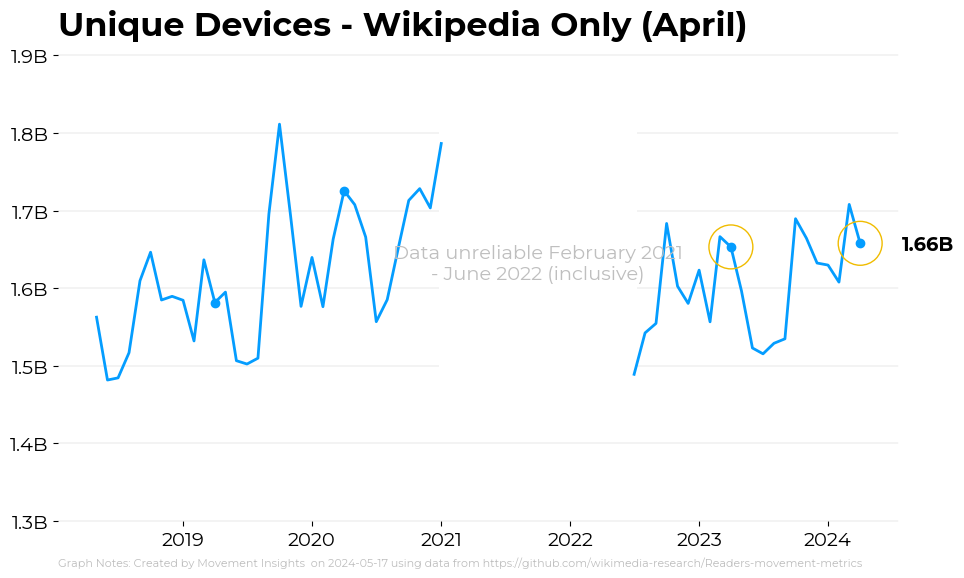

In [1]:
from wikicharts import Wikichart
import pandas as pd
from config import wmf_colors, style_parameters, wmf_regions
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager

from parameters import (
    readers_data_path,
    save_directory,
)

def main():
    print("Generating Unique Devices chart...")
    print("Formatting may look incorrect in jupyter notebook window but the saved chart image will still be correct.")

    #---PARAMETERS---
    save_file_name = "Unique_Devices.png"
    display_flag = True

    #---CLEAN DATA---
    df = pd.read_csv(readers_data_path, sep='\t')
    start_date = "2018-05-01"
    end_date = datetime.today()
    df['month'] = pd.to_datetime(df['month'])
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]
    month_interest = df.iloc[-1]['month'].month
    df = df.drop(columns=[
        'automated_pageviews', 'desktop', 'interactions', 'mobileweb', 'previews_seen', 'total_pageview'
    ])
    df_a = df[df["month"] <= "2021-01-01"]
    df_b = df[df["month"] >= "2022-07-01"]
    monthly_df_a = df_a[df_a['month'].dt.month == month_interest]
    monthly_df_b = df_b[df_b['month'].dt.month == month_interest]
    monthly_df = pd.concat([monthly_df_a, monthly_df_b])
    yoy_highlight = pd.concat([monthly_df.iloc[-2,:], monthly_df.iloc[-1,:]], axis=1).T

    #---MAKE CHART---
    chart = Wikichart(start_date, end_date, df)
    chart.init_plot(width=12)
    plt.plot(df_a.month, df_a.unique_devices, 
             label='_nolegend_', 
             color=wmf_colors['brightblue'], 
             linewidth=2, zorder=6)
    plt.plot(df_b.month, df_b.unique_devices, 
             label='_nolegend_', 
             color=wmf_colors['brightblue'], 
             linewidth=2, zorder=6)
    plt.scatter(monthly_df.month, monthly_df.unique_devices, label='_nolegend_', color=wmf_colors['brightblue'], zorder=7)
    highlight_radius = 1000000
    plt.scatter(yoy_highlight.month, 
                yoy_highlight.unique_devices, 
                label='_nolegend_', 
                s=(highlight_radius**0.5), 
                facecolors='none', 
                edgecolors=wmf_colors['yellow'], 
                zorder=8)
    
    block_off_start = datetime.strptime("2021-01-01", '%Y-%m-%d')
    block_off_end = datetime.strptime("2022-07-01", '%Y-%m-%d')
    chart.block_off(block_off_start, block_off_end, rectangle_text="Data unreliable February 2021 - June 2022 (inclusive)")
    chart.format(title=f'Unique Devices - Wikipedia Only', 
                 radjust=0.8, 
                 data_source="https://github.com/wikimedia-research/Readers-movement-metrics")
    chart.annotate(x='month', y='unique_devices', num_annotation=chart.calc_finalcount(y='unique_devices'))
    chart.finalize_plot(save_file_name, display=display_flag)

if __name__ == "__main__":
    main()